In [1]:
# Copyright (c) Facebook, Inc. and its affiliates.
# All rights reserved.
#
# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.
#

In [1]:
import json
import os

import numpy as np
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
os.environ['OMP_NUM_THREADS'] = "1"

In [2]:
def parse_noise_results(results_folder):
    
    df = pd.DataFrame(columns=['Noise (%)', 'Score', 'Training Size'])

    noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    for noise_level in noise_levels:

        for filename in [f for f in sorted(os.listdir(Path(results_folder + f'_Noise{noise_level}'))) if '.json' in f]:
            
            key = filename
            #print(key)

            with open(Path(Path(results_folder + f'_Noise{noise_level}'), filename), 'r') as f:
                result = json.load(f)
                
            if '10' in key:
                size = 10
            elif '300' in key:
                size = 300
            elif '30' in key:
                size = 30
            elif '60' in key:
                size = 60
            elif '150' in key:
                size = 150

            df = df.append({'Noise (%)': int(noise_level*100), 'Score': float(result['test_scores']['f1']), 'Training Size': f'{int(size)} points'}, ignore_index=True)
                    
    return df

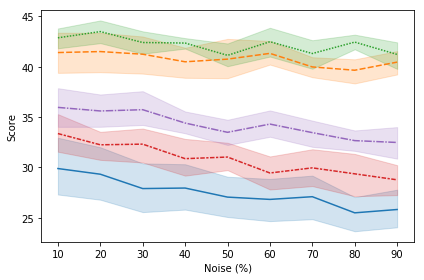

In [13]:
if __name__ == '__main__':
    results_folder = '../results/Spouse/AdaptiveLFs/NeuralPMSpouse'
    df = parse_noise_results(results_folder)
    
    ax = sns.lineplot(x="Noise (%)", y="Score", hue="Training Size", style="Training Size", data=df, legend=False)
    #plt.title('Impact of rationale noise on performance')
    #plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig('impact_noise.png', dpi=600)
    plt.show()